In [1]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/jingchen/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Duncan's Prestige Dataset

In [2]:
prestige=sm.datasets.get_rdataset("Duncan", "carData", cache=True).data

In [3]:
prestige.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [4]:
prestige_model=ols('prestige~income+education', data=prestige).fit()

In [5]:
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 01 Jan 2019   Prob (F-statistic):           8.65e-17
Time:                        23:26:53   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

### Influence plots

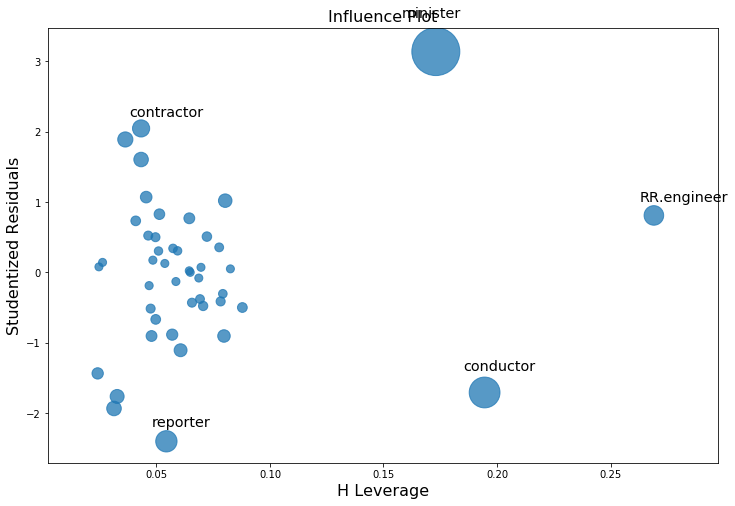

In [6]:
fig,ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.influence_plot(prestige_model, ax=ax, orientation='cooks')

Both contractor and reporter have low levergae but a large residual. PR.engineer has large levergae and small residual. Conductor and minister have high leverage and large residual, and therefore, large influence.

### Partial Regression Plots

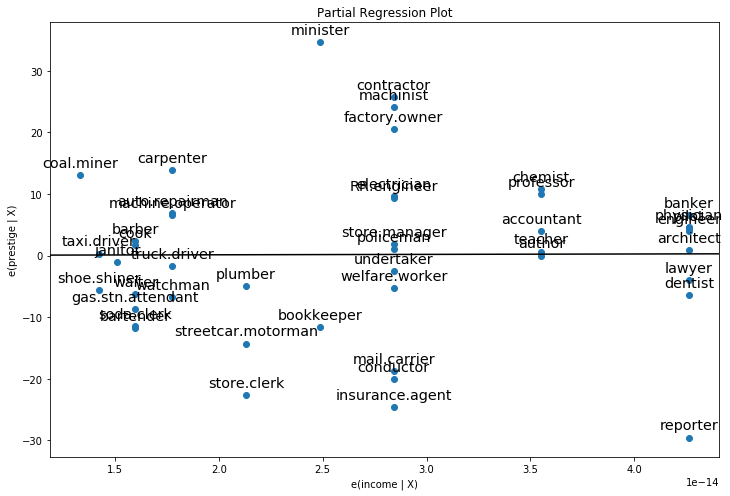

In [7]:
fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.plot_partregress('prestige', 'income', ['income', 'education'], data=prestige, ax=ax)

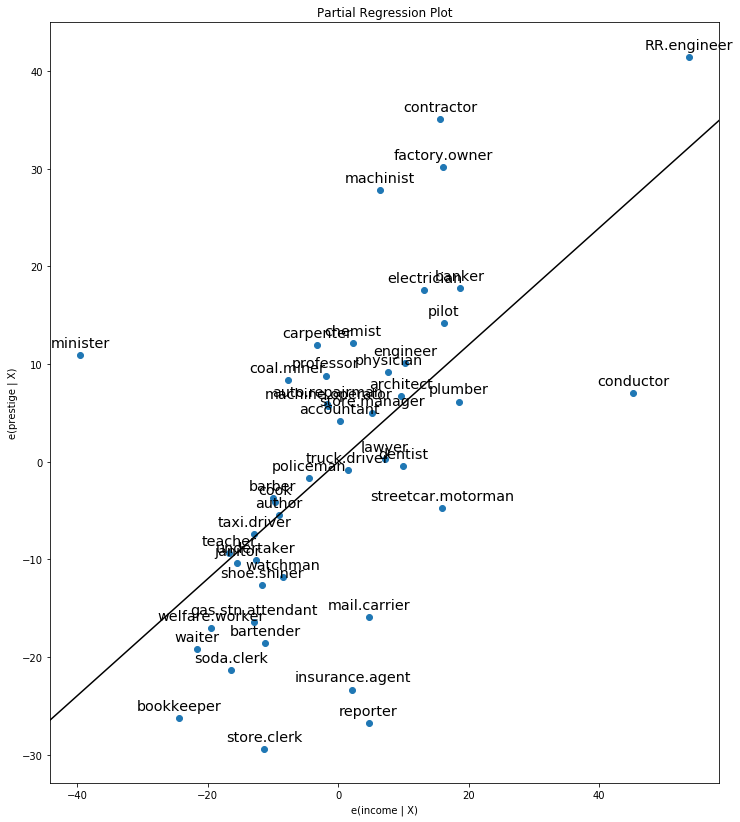

In [8]:
fig, ax = plt.subplots(figsize=(12,14))
fig = sm.graphics.plot_partregress('prestige', 'income', ['education'], data = prestige, ax = ax)

As you can see the partial regression plot confirms the influence of conductor, minister, and PR.engineer on the partial relationship between income and prestige. The cases greatly decrease the effect of income on prestige. Dropping these cases confirms this.

In [9]:
subset= ~prestige.index.isin(['conductor', 'PR.engineer', 'minister'])
prestige_model2=ols('prestige ~ income+education', data=prestige, subset=subset).fit()
print(prestige_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     141.3
Date:                Tue, 01 Jan 2019   Prob (F-statistic):           7.42e-19
Time:                        23:36:43   Log-Likelihood:                -164.16
No. Observations:                  43   AIC:                             334.3
Df Residuals:                      40   BIC:                             339.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4090      3.653     -1.755      0.0

For a quick check of all the regressors, you can use plot_partregress_grid. These plots will not lable the points, but you can use them to identify problems and then use plot_patregress to get more informaiton. 

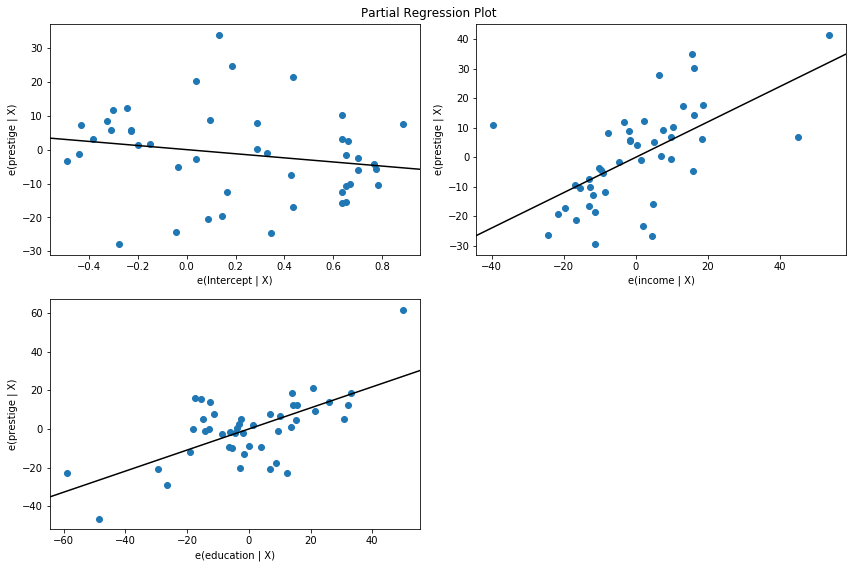

In [10]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_partregress_grid(prestige_model, fig=fig)

### Component-Compoent plus Residual (CCPR) Plots

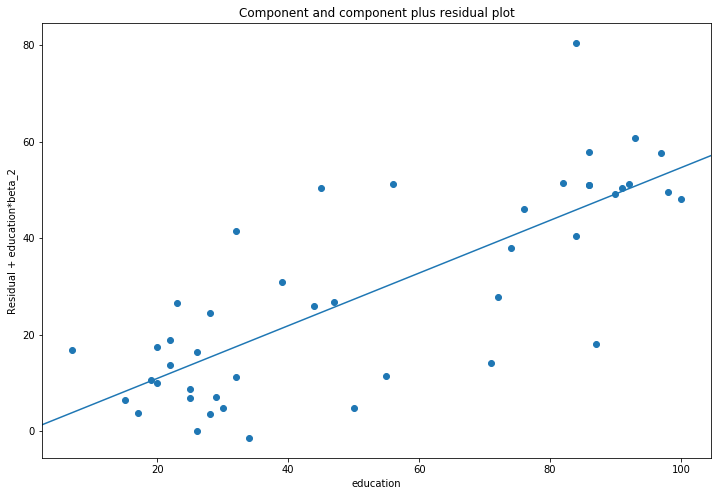

In [11]:
fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.plot_ccpr(prestige_model, 'education', ax=ax)

As you can see the relationship between the variation in prestige explained by education conditional on income seems to be linear, though you can see there are some observations that are exerting considerable influence on the relationship. We can quickly look at more than one variable.

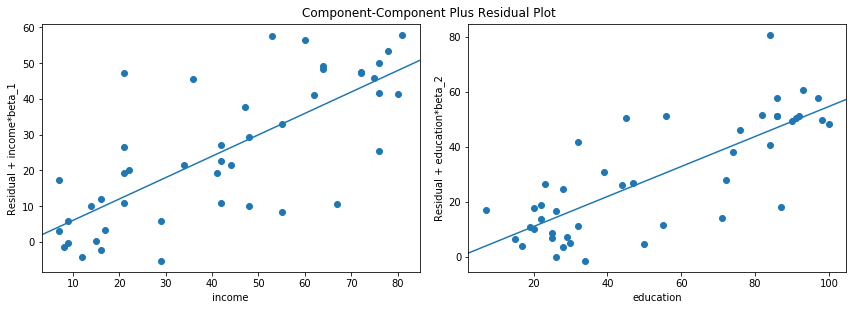

In [12]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_ccpr_grid(prestige_model, fig=fig)

### Regression plot
The plot_regress_exog function is a convenience function that gives a 2*2 plot containing the dependent variable and fitted values with confidence intervals vs. the independent varaible chosen, the residuals of the model vs. the chosen independent varaible, a partial regression plot, and a CCPR plot. This function can be used for quickly checking modeling assumptions with respect to a single regressor.

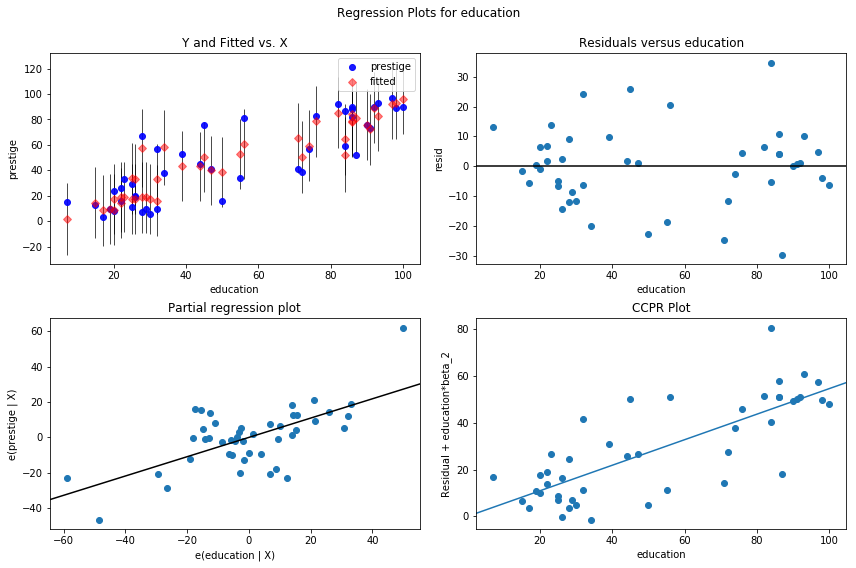

In [13]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(prestige_model, 'education', fig=fig)

### Fit plot
The plot_fit function plots the fitted values versus a chosen indepdent variable. It includes prediction confidence intervals and optionally plots the true dependent variable.

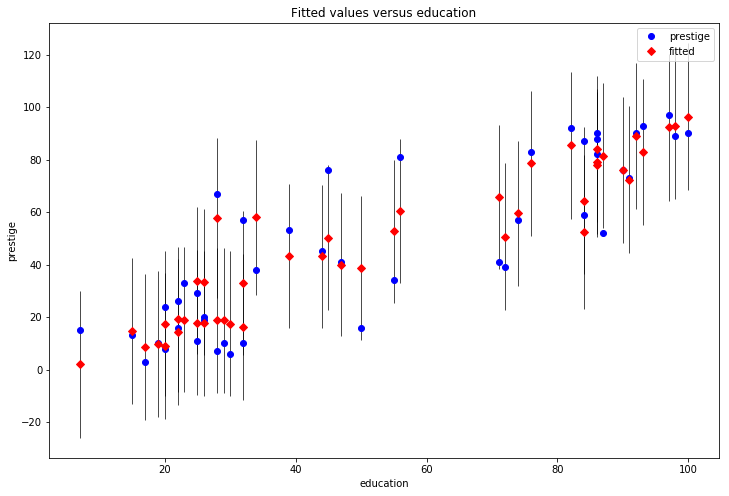

In [14]:
fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.plot_fit(prestige_model,'education', ax=ax)

### Statewide Crime 2009 Dataset

In [15]:
dta=sm.datasets.statecrime.load_pandas().data

/Users/jingchen/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:2242: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [16]:
dta.head(5)

,violent,murder,hs_grad,poverty,single,white,urban
state,,,,,,,
Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
California,473.4,5.4,80.6,14.2,27.8,62.7,89.73


In [18]:
crime_model=ols('murder ~ hs_grad + poverty + single + urban', data=dta).fit()
print(crime_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     50.08
Date:                Wed, 02 Jan 2019   Prob (F-statistic):           3.42e-16
Time:                        00:09:56   Log-Likelihood:                -95.050
No. Observations:                  51   AIC:                             200.1
Df Residuals:                      46   BIC:                             209.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -44.1024     12.086     -3.649      0.0

### Partial Regression Plots

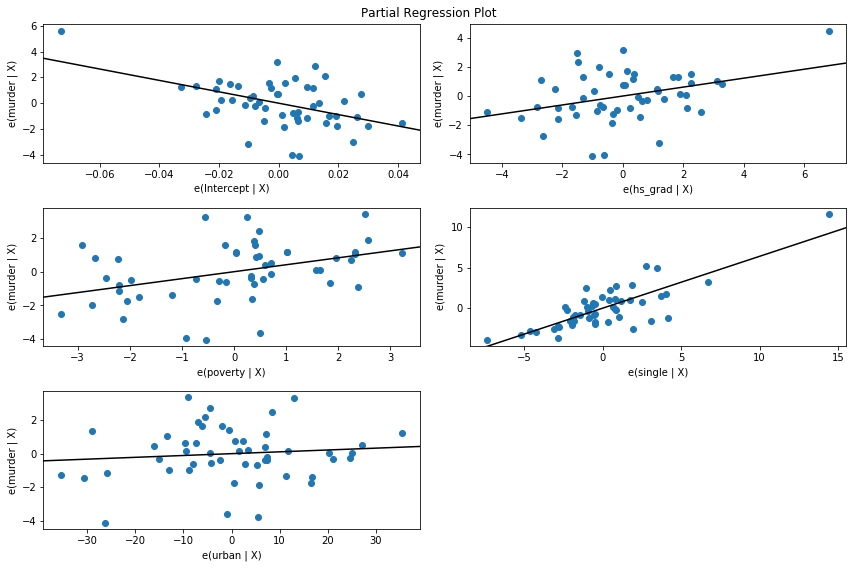

In [19]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_partregress_grid(crime_model, fig=fig)

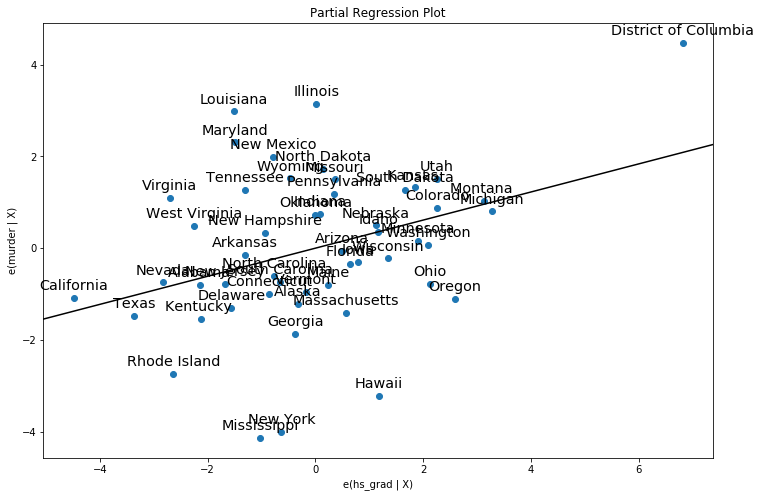

In [20]:
fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.plot_partregress('murder', 'hs_grad', ['urban', 'poverty', 'single'], ax=ax, data=dta)

### Leverage-Resids2 Plot
Closely related to the influence_plot is the levergae-resid2 plot.

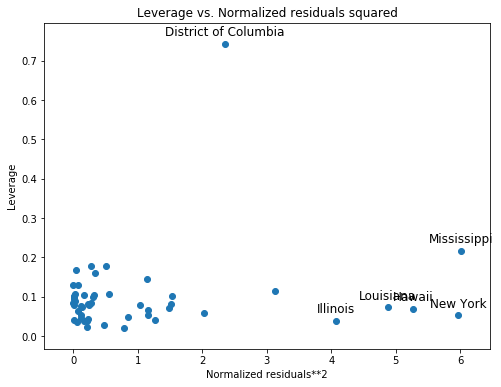

In [22]:
fig,ax=plt.subplots(figsize=(8,6))
fig=sm.graphics.plot_leverage_resid2(crime_model, ax=ax)

### Influence plot

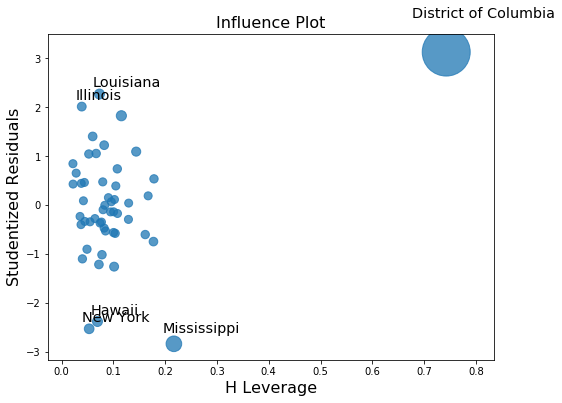

In [23]:
fig, ax=plt.subplots(figsize=(8,6))
fig=sm.graphics.influence_plot(crime_model, ax=ax)

### Using robust regression to corretc for outliers.

Part of the problem here in recreating the Stata results in that M-estimators are not robust to leverage points. MM-estimator should do better with this examples.

In [24]:
from statsmodels.formula.api import rlm

In [25]:
rob_crime_model = rlm('murder ~ urban + poverty + single + hs_grad', data = dta, M=sm.robust.norms.TukeyBiweight(3)).fit(conv='weights')
print(rob_crime_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 murder   No. Observations:                   51
Model:                            RLM   Df Residuals:                       46
Method:                          IRLS   Df Model:                            4
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 02 Jan 2019                                         
Time:                        00:23:16                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2986      9.494     -0.453      0.6

There isnot yet an influence disgnostics method as part of RLM, but we can recreate them.

In [27]:
weights=rob_crime_model.weights
idx=weights>0
X=rob_crime_model.model.exog[idx.values]
ww=weights[idx]/weights[idx].mean()
hat_matrix_diag=ww*(X*np.linalg.pinv(X).T).sum(1)
resid=rob_crime_model.resid
resid2=resid**2
resid2 /=resid2.sum()
nobs=int(idx.sum())
hm=hat_matrix_diag.mean()
rm=resid2.mean()

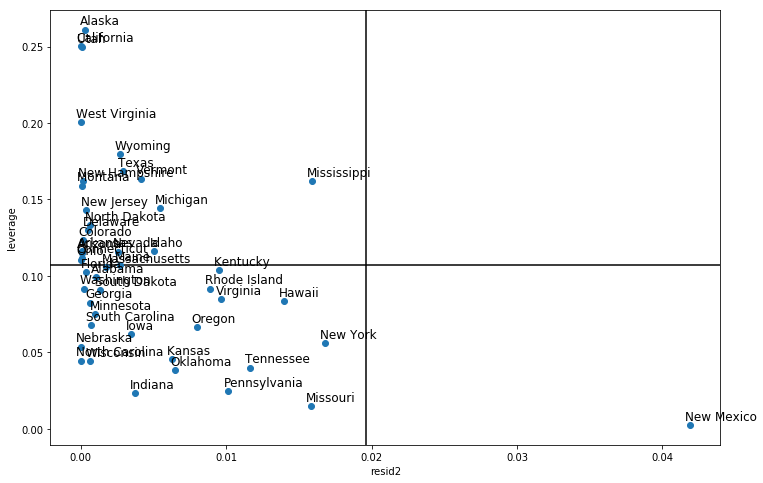

In [28]:
from statsmodels.graphics import utils

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(resid2[idx], hat_matrix_diag, 'o')
ax = utils.annotate_axes(range(nobs), labels = rob_crime_model.model.data.row_labels[idx], 
                        points = lzip(resid2[idx], hat_matrix_diag,), offset_points = [(-5,5)]*nobs, 
                        size='large', ax=ax)
ax.set_xlabel('resid2')
ax.set_ylabel('leverage')
ylim = ax.get_ylim()
ax.vlines(rm, *ylim)
xlim = ax.get_xlim()
ax.hlines(hm, *xlim)
ax.margins(0,0)